In [1]:
!pip install torch torchvision torchaudio
!pip install numpy matplotlib tqdm scikit-learn opencv-python
!pip install datasets
!pip install pillow
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split

PyTorch 버전: 2.6.0+cu124
CUDA 사용 가능: True
CUDA 버전: 12.4
GPU 모델: Tesla T4
GPU 메모리: 15.83 GB
사용 장치: cuda
데이터셋 로드 중...
데이터셋 구조: ['train', 'test', 'valid']
학습 데이터 크기: 1502, 검증 데이터 크기: 429, 테스트 데이터 크기: 215

초기 GPU 메모리 상태:
할당된 GPU 메모리: 0.00 GB
캐시된 GPU 메모리: 0.00 GB
최대 할당된 GPU 메모리: 0.18 GB

모델 생성 중...
모델 생성 완료 - 파라미터 수: 1.57M
메모리 상태 확인:
할당된 GPU 메모리: 0.00 GB
캐시된 GPU 메모리: 0.00 GB
최대 할당된 GPU 메모리: 0.18 GB

학습 시작...


Epoch 1/30: 100%|██████████| 751/751 [00:49<00:00, 15.13it/s, loss=0.266]


Epoch 1/30, Time: 57.06s, Train Loss: 0.6002, Val Loss: 0.5775, LR: 0.000200
Model saved with Val Loss: 0.5775
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 2/30: 100%|██████████| 751/751 [00:49<00:00, 15.10it/s, loss=0.254]


Epoch 2/30, Time: 55.91s, Train Loss: 0.4918, Val Loss: 0.5398, LR: 0.000200
Model saved with Val Loss: 0.5398
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 3/30: 100%|██████████| 751/751 [00:50<00:00, 15.02it/s, loss=0.302]


Epoch 3/30, Time: 57.18s, Train Loss: 0.4653, Val Loss: 0.4919, LR: 0.000200
Model saved with Val Loss: 0.4919
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 4/30: 100%|██████████| 751/751 [00:49<00:00, 15.10it/s, loss=0.708]


Epoch 4/30, Time: 56.54s, Train Loss: 0.4366, Val Loss: 0.4663, LR: 0.000200
Model saved with Val Loss: 0.4663
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 5/30: 100%|██████████| 751/751 [00:49<00:00, 15.11it/s, loss=0.209]


Epoch 5/30, Time: 56.09s, Train Loss: 0.4244, Val Loss: 0.4636, LR: 0.000200
Model saved with Val Loss: 0.4636
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 6/30: 100%|██████████| 751/751 [00:49<00:00, 15.11it/s, loss=0.259]


Epoch 6/30, Time: 57.02s, Train Loss: 0.4047, Val Loss: 0.4722, LR: 0.000200
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 7/30: 100%|██████████| 751/751 [00:50<00:00, 15.01it/s, loss=0.797]


Epoch 7/30, Time: 56.17s, Train Loss: 0.4006, Val Loss: 0.4224, LR: 0.000200
Model saved with Val Loss: 0.4224
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 8/30: 100%|██████████| 751/751 [00:49<00:00, 15.04it/s, loss=0.0875]


Epoch 8/30, Time: 57.31s, Train Loss: 0.3752, Val Loss: 0.4183, LR: 0.000200
Model saved with Val Loss: 0.4183
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 9/30: 100%|██████████| 751/751 [00:49<00:00, 15.13it/s, loss=0.0949]


Epoch 9/30, Time: 55.85s, Train Loss: 0.3816, Val Loss: 0.4151, LR: 0.000200
Model saved with Val Loss: 0.4151
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 10/30: 100%|██████████| 751/751 [00:49<00:00, 15.09it/s, loss=0.17]


Epoch 10/30, Time: 57.04s, Train Loss: 0.3906, Val Loss: 0.3485, LR: 0.000200
Model saved with Val Loss: 0.3485
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 11/30: 100%|██████████| 751/751 [00:50<00:00, 14.97it/s, loss=0.569]


Epoch 11/30, Time: 56.67s, Train Loss: 0.3628, Val Loss: 0.3346, LR: 0.000200
Model saved with Val Loss: 0.3346
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 12/30: 100%|██████████| 751/751 [00:51<00:00, 14.60it/s, loss=0.148]


Epoch 12/30, Time: 57.57s, Train Loss: 0.3859, Val Loss: 0.4265, LR: 0.000200
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 13/30: 100%|██████████| 751/751 [00:49<00:00, 15.06it/s, loss=0.178]


Epoch 13/30, Time: 57.27s, Train Loss: 0.3606, Val Loss: 0.3254, LR: 0.000200
Model saved with Val Loss: 0.3254
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 14/30: 100%|██████████| 751/751 [00:49<00:00, 15.13it/s, loss=0.514]


Epoch 14/30, Time: 55.77s, Train Loss: 0.3292, Val Loss: 0.3573, LR: 0.000200
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 15/30: 100%|██████████| 751/751 [00:49<00:00, 15.14it/s, loss=0.703]


Epoch 15/30, Time: 56.81s, Train Loss: 0.3137, Val Loss: 0.3590, LR: 0.000200
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 16/30: 100%|██████████| 751/751 [00:49<00:00, 15.06it/s, loss=0.205]


Epoch 16/30, Time: 56.01s, Train Loss: 0.3464, Val Loss: 0.3432, LR: 0.000200
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 17/30: 100%|██████████| 751/751 [00:49<00:00, 15.09it/s, loss=0.707]


Epoch 17/30, Time: 57.14s, Train Loss: 0.3083, Val Loss: 0.3870, LR: 0.000100
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 18/30: 100%|██████████| 751/751 [00:50<00:00, 14.99it/s, loss=0.481]


Epoch 18/30, Time: 56.45s, Train Loss: 0.2936, Val Loss: 0.3322, LR: 0.000100
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 19/30: 100%|██████████| 751/751 [00:51<00:00, 14.58it/s, loss=0.285]


Epoch 19/30, Time: 58.17s, Train Loss: 0.2531, Val Loss: 0.3087, LR: 0.000100
Model saved with Val Loss: 0.3087
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 20/30: 100%|██████████| 751/751 [00:50<00:00, 14.85it/s, loss=0.00157]


Epoch 20/30, Time: 57.91s, Train Loss: 0.2391, Val Loss: 0.3071, LR: 0.000100
Model saved with Val Loss: 0.3071
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 21/30: 100%|██████████| 751/751 [00:50<00:00, 14.85it/s, loss=0.723]


Epoch 21/30, Time: 56.87s, Train Loss: 0.2765, Val Loss: 0.3895, LR: 0.000100
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 22/30: 100%|██████████| 751/751 [00:50<00:00, 14.85it/s, loss=0.589]


Epoch 22/30, Time: 57.90s, Train Loss: 0.2730, Val Loss: 0.3566, LR: 0.000100
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 23/30: 100%|██████████| 751/751 [00:51<00:00, 14.69it/s, loss=0.264]


Epoch 23/30, Time: 58.44s, Train Loss: 0.2468, Val Loss: 0.3111, LR: 0.000100
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 24/30: 100%|██████████| 751/751 [00:50<00:00, 15.02it/s, loss=0.705]


Epoch 24/30, Time: 56.19s, Train Loss: 0.2280, Val Loss: 0.3217, LR: 0.000050
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 25/30: 100%|██████████| 751/751 [00:50<00:00, 15.00it/s, loss=0.00249]


Epoch 25/30, Time: 57.59s, Train Loss: 0.2240, Val Loss: 0.3124, LR: 0.000050
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 26/30: 100%|██████████| 751/751 [00:50<00:00, 14.86it/s, loss=0.00218]


Epoch 26/30, Time: 56.84s, Train Loss: 0.2067, Val Loss: 0.2974, LR: 0.000050
Model saved with Val Loss: 0.2974
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 27/30: 100%|██████████| 751/751 [00:50<00:00, 14.87it/s, loss=0.103]


Epoch 27/30, Time: 57.20s, Train Loss: 0.1956, Val Loss: 0.3092, LR: 0.000050
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 28/30: 100%|██████████| 751/751 [00:50<00:00, 14.97it/s, loss=0.0562]


Epoch 28/30, Time: 57.50s, Train Loss: 0.2015, Val Loss: 0.2937, LR: 0.000050
Model saved with Val Loss: 0.2937
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 29/30: 100%|██████████| 751/751 [00:50<00:00, 15.02it/s, loss=0.000446]


Epoch 29/30, Time: 56.17s, Train Loss: 0.1816, Val Loss: 0.3499, LR: 0.000050
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


Epoch 30/30: 100%|██████████| 751/751 [00:50<00:00, 14.96it/s, loss=0.162]


Epoch 30/30, Time: 57.56s, Train Loss: 0.1790, Val Loss: 0.3155, LR: 0.000050
할당된 GPU 메모리: 0.03 GB
캐시된 GPU 메모리: 0.05 GB
최대 할당된 GPU 메모리: 0.18 GB


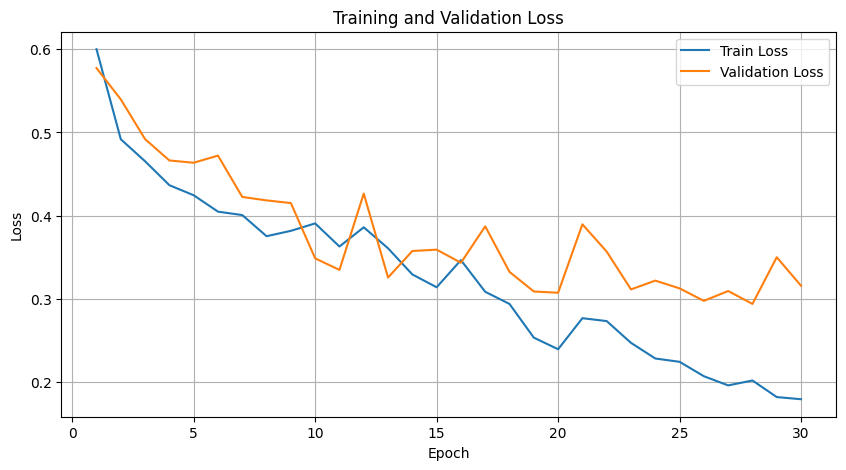


검증 세트에 대한 평가:
모델 평가 중...


평가 중:   0%|          | 0/215 [00:00<?, ?it/s]<ipython-input-4-1281f082f47c>:765: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
평가 중: 100%|██████████| 215/215 [00:06<00:00, 32.17it/s]


ROC-AUC 계산 중 오류가 발생했습니다. 일반적으로 클래스가 하나만 존재할 때 발생합니다.

=== 모델 평가 결과 ===
F1 Score: 0.5897
ROC-AUC: 0.0000
IoU Score: 0.4182
Dice Score: 0.5897
Precision: 0.6766
Recall: 0.5226

=== 혼동 행렬 ===
True Positives: 350667
False Positives: 167577
True Negatives: 27276389
False Negatives: 320311

결과 시각화 중...


<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

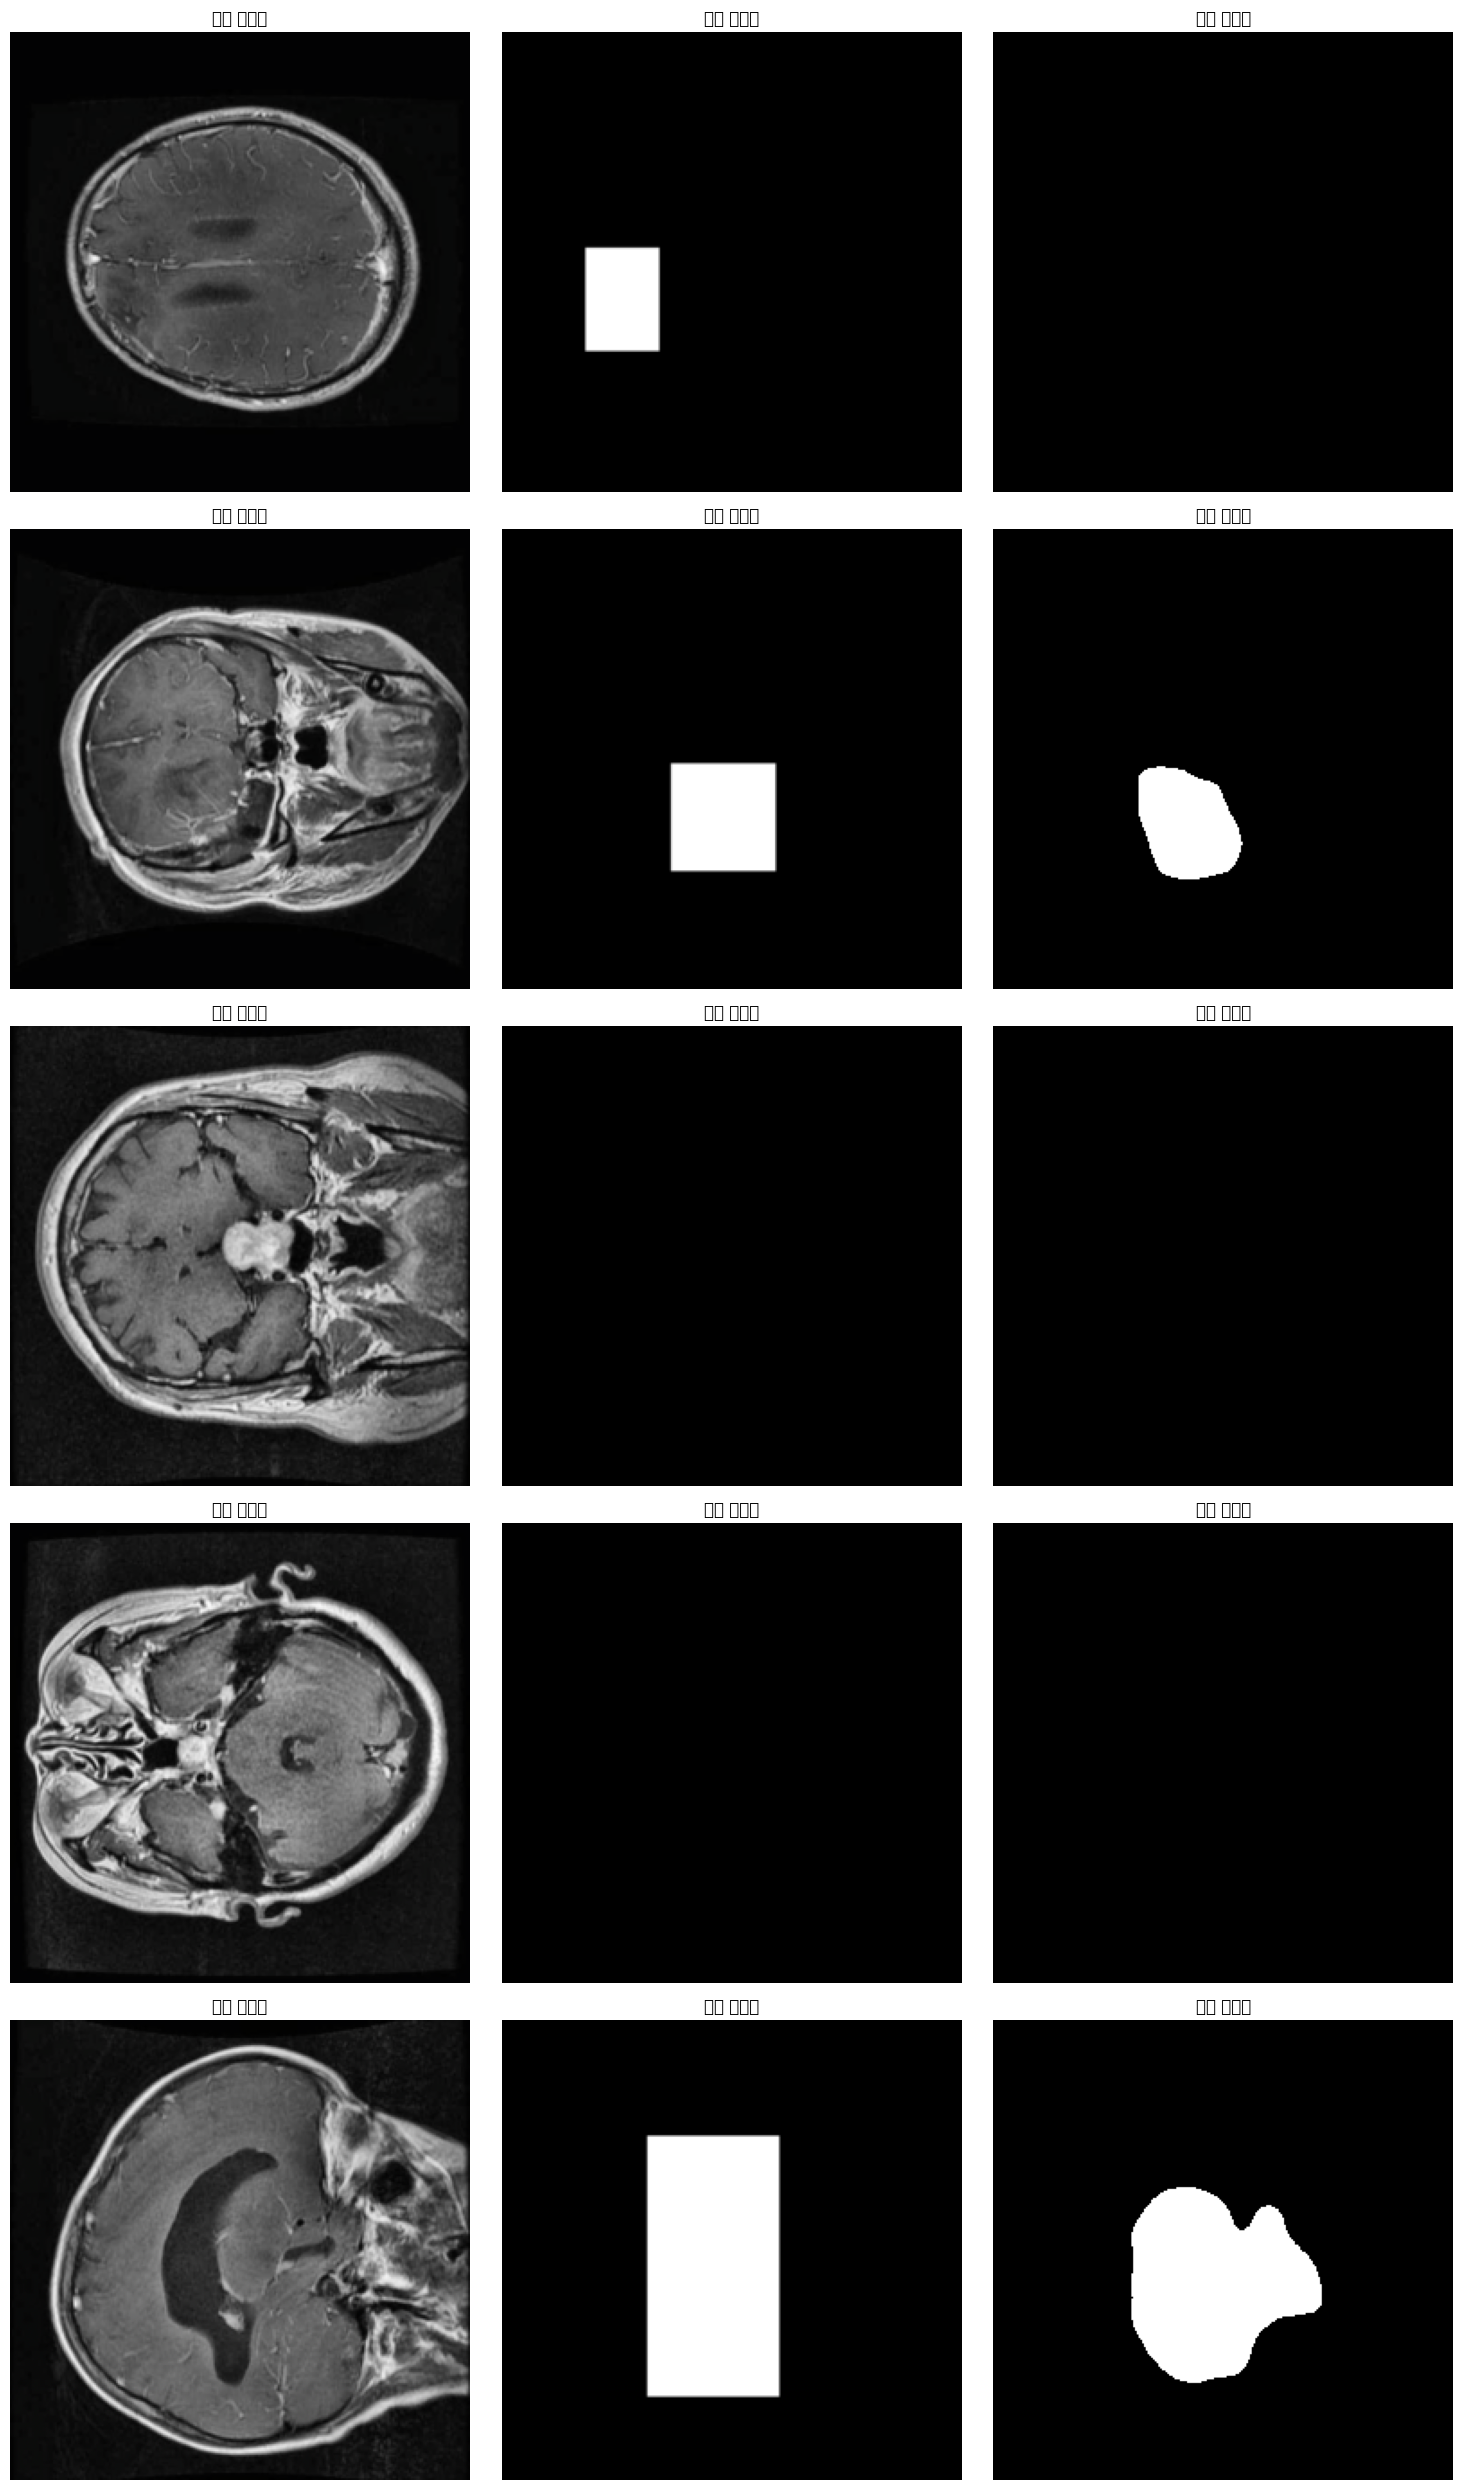


테스트 세트에 대한 평가 (최종 성능):
모델 평가 중...


평가 중:   0%|          | 0/108 [00:00<?, ?it/s]<ipython-input-4-1281f082f47c>:765: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
평가 중: 100%|██████████| 108/108 [00:04<00:00, 21.61it/s]


ROC-AUC 계산 중 오류가 발생했습니다. 일반적으로 클래스가 하나만 존재할 때 발생합니다.

=== 모델 평가 결과 ===
F1 Score: 0.6192
ROC-AUC: 0.0000
IoU Score: 0.4485
Dice Score: 0.6192
Precision: 0.7019
Recall: 0.5540

=== 혼동 행렬 ===
True Positives: 209873
False Positives: 89135
True Negatives: 13622276
False Negatives: 168956

결과 시각화 중...


<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-1281f082f47c>:917: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

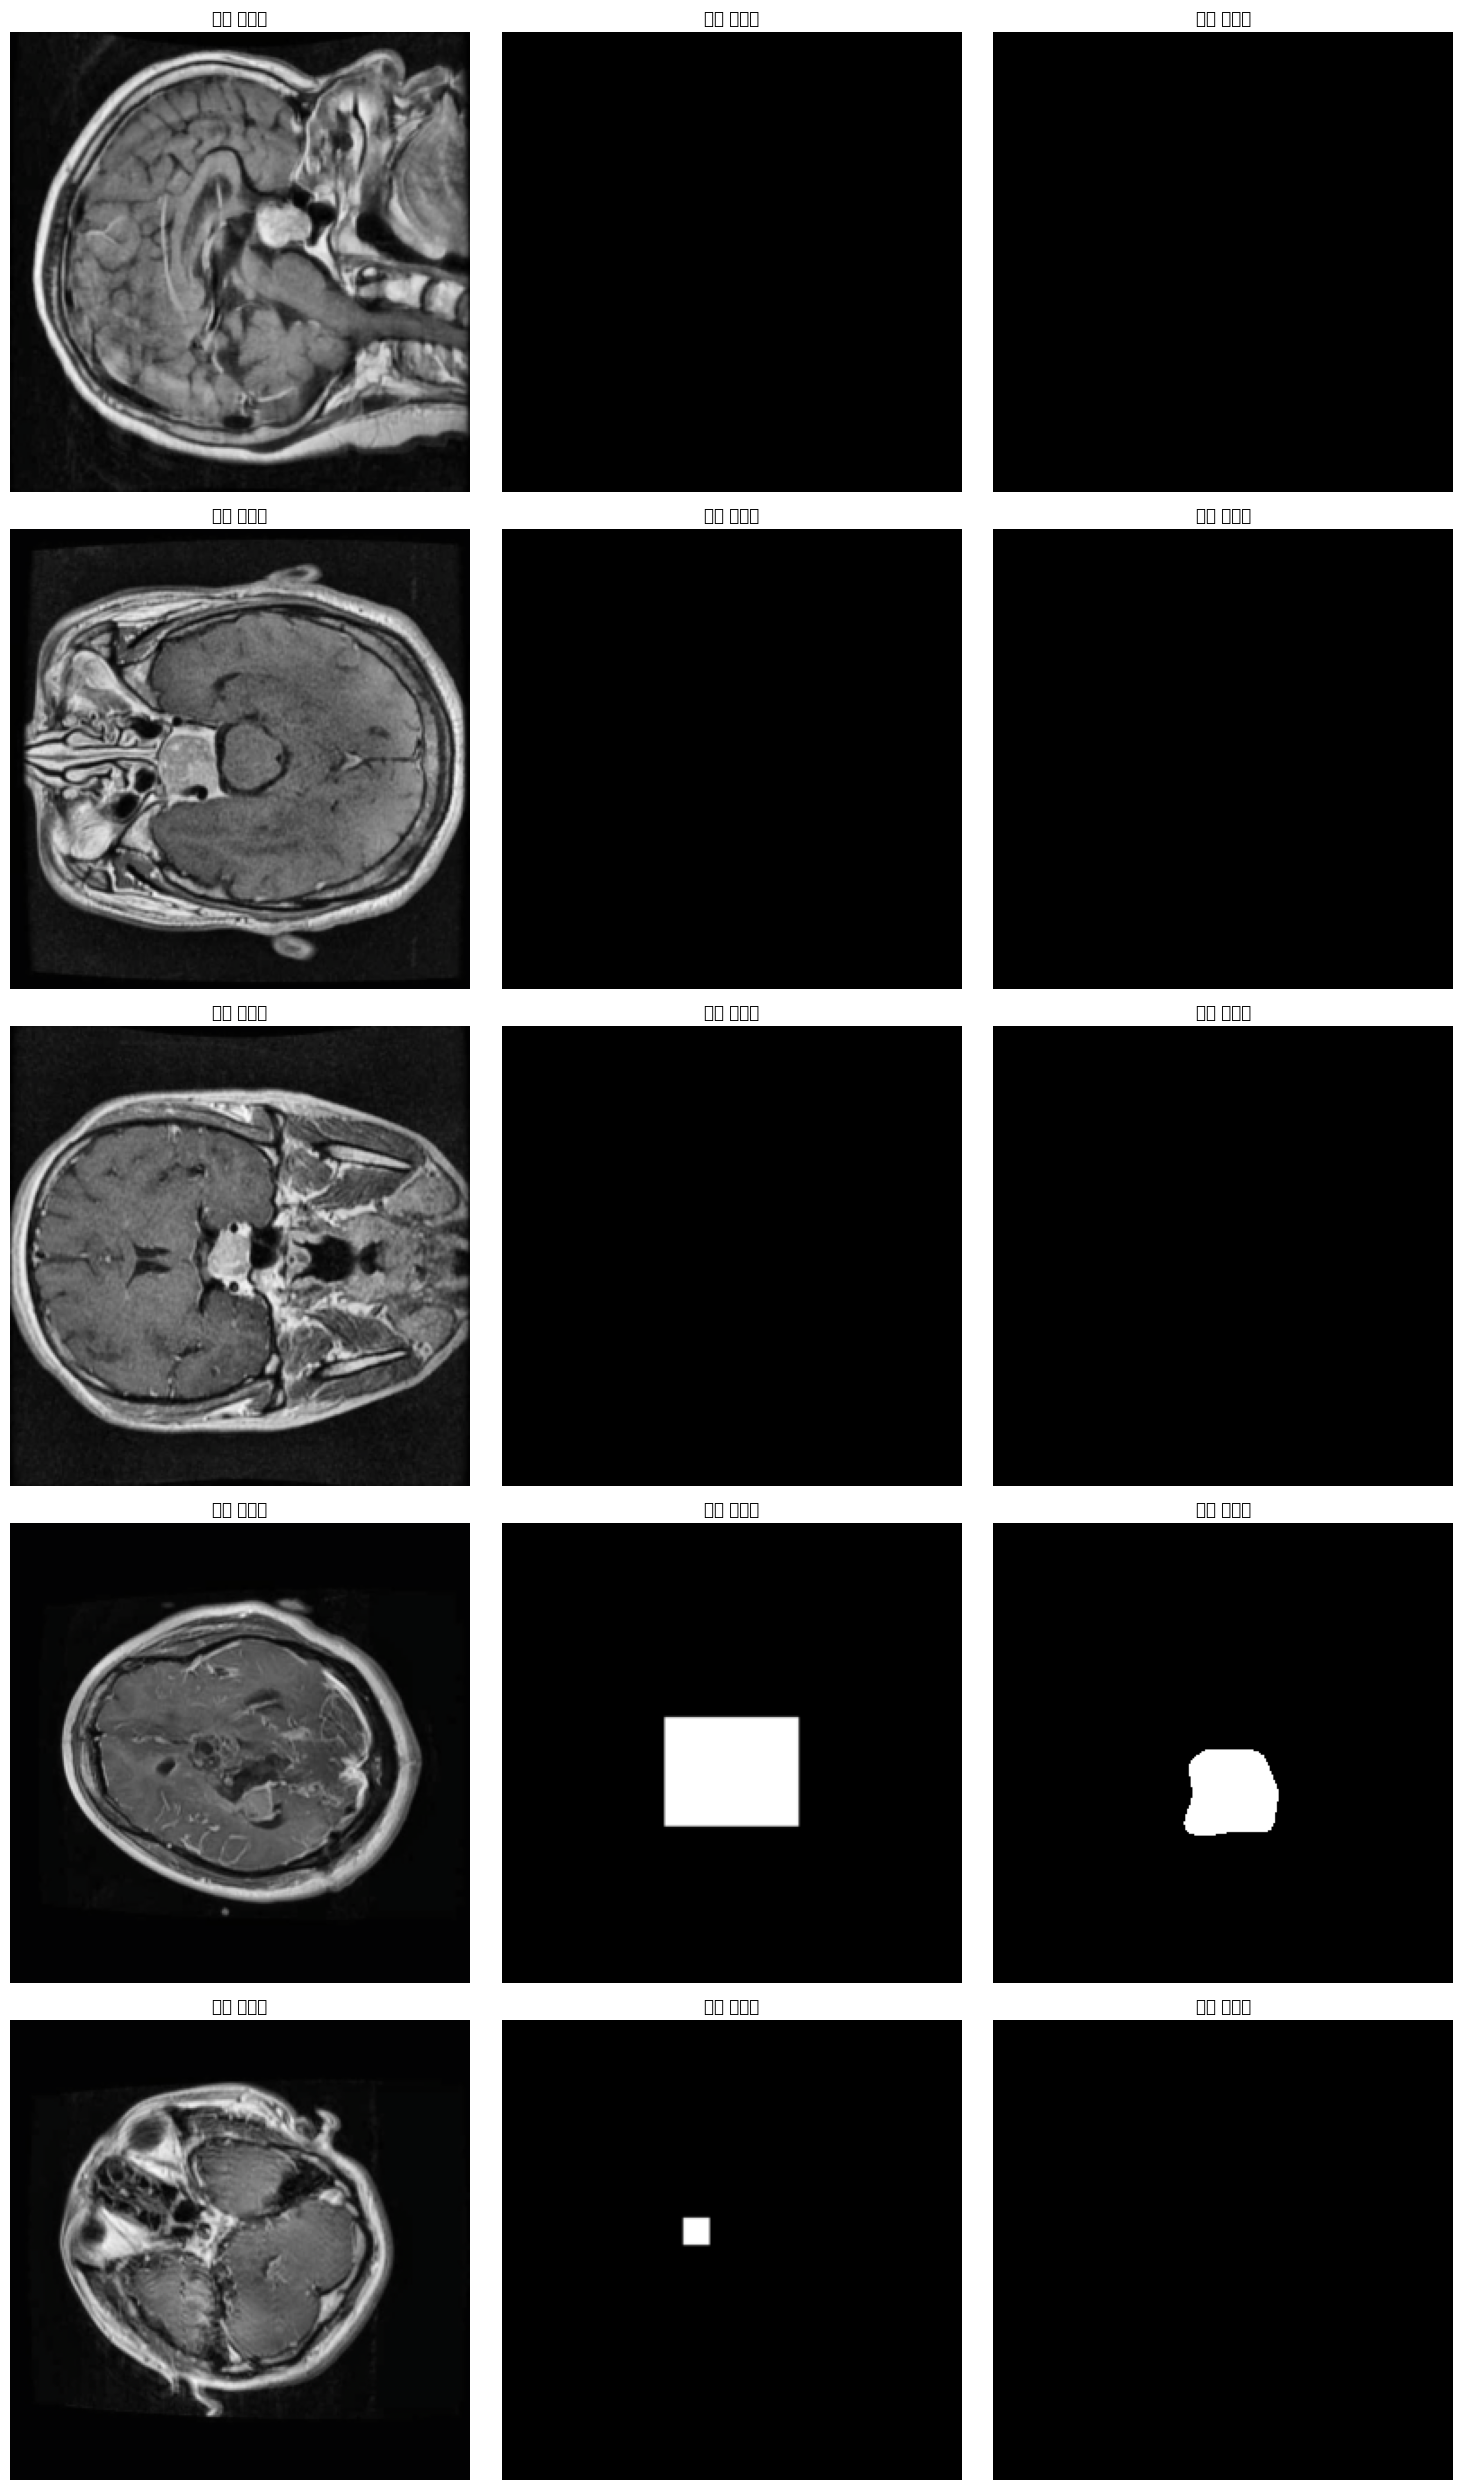

학습 및 평가 완료!


In [4]:
# 코랩 환경 확인 및 GPU 설정
import torch
print(f"PyTorch 버전: {torch.__version__}")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA 버전: {torch.version.cuda}")
    print(f"GPU 모델: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# 메모리 확보를 위해 사용 가능한 CUDA 캐시 지우기
torch.cuda.empty_cache()

# CUDA 메모리 정보 출력 함수
def print_gpu_memory():
    if torch.cuda.is_available():
        print(f'할당된 GPU 메모리: {torch.cuda.memory_allocated() / 1e9:.2f} GB')
        print(f'캐시된 GPU 메모리: {torch.cuda.memory_reserved() / 1e9:.2f} GB')
        print(f'최대 할당된 GPU 메모리: {torch.cuda.max_memory_allocated() / 1e9:.2f} GB')

# 필요한 라이브러리 설치
!pip install -q datasets
!pip install -q opencv-python

# 필요한 라이브러리 임포트
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
import time
import gc

# 메모리 최적화 설정 (메모리 사용량 절약)
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False

# 뇌종양 데이터셋 클래스 정의
class BrainTumorDataset(Dataset):
    def __init__(self, dataset_split, transform=None, mask_transform=None):
        self.dataset = dataset_split
        self.transform = transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # 이미지 가져오기
        image = item['image']

        # 세그멘테이션 마스크 생성
        mask = np.zeros((item['height'], item['width']), dtype=np.uint8)
        if len(item['segmentation']) > 0 and item['category_id'] == 1:  # 종양이 있는 경우
            # 세그멘테이션 데이터를 마스크로 변환
            for polygon in item['segmentation']:
                # polygon은 [x1, y1, x2, y2, ...] 형태의 좌표 리스트
                poly_array = np.array(polygon).reshape(-1, 2)
                # fillPoly로 마스크 채우기
                cv2.fillPoly(mask, [poly_array.astype(np.int32)], 1)

        # PIL 이미지로 변환
        image_pil = Image.fromarray(np.array(image))
        mask_pil = Image.fromarray(mask * 255)  # 0-1 마스크를 0-255로 변환

        # 변환 적용
        if self.transform is not None:
            image_pil = self.transform(image_pil)

        if self.mask_transform is not None:
            mask_pil = self.mask_transform(mask_pil)

        return image_pil, mask_pil

# 메모리 효율적인 BasicBlock
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.downsample = None
        if stride != 1 or inplanes != planes * self.expansion:
            self.downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes * self.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * self.expansion)
            )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)

        self.downsample = None
        if stride != 1 or inplanes != planes * self.expansion:
            self.downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes * self.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * self.expansion)
            )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

# 메모리 효율적인 HRNet 정의 - 더 작은 크기로 조정
class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks, num_blocks, num_inchannels, num_channels, multi_scale_output=True):
        super(HighResolutionModule, self).__init__()
        self.num_inchannels = num_inchannels
        self.num_branches = num_branches
        self.multi_scale_output = multi_scale_output

        self.branches = self._make_branches(num_branches, blocks, num_blocks, num_channels)
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=True)

    def _make_one_branch(self, branch_index, block, num_blocks, num_channels, stride=1):
        layers = []
        layers.append(block(self.num_inchannels[branch_index], num_channels[branch_index], stride))

        self.num_inchannels[branch_index] = num_channels[branch_index] * block.expansion
        for i in range(1, num_blocks[branch_index]):
            layers.append(block(self.num_inchannels[branch_index], num_channels[branch_index]))

        return nn.Sequential(*layers)

    def _make_branches(self, num_branches, block, num_blocks, num_channels):
        branches = []
        for i in range(num_branches):
            branches.append(self._make_one_branch(i, block, num_blocks, num_channels))
        return nn.ModuleList(branches)

    def _make_fuse_layers(self):
        if self.num_branches == 1:
            return None

        num_branches = self.num_branches
        num_inchannels = self.num_inchannels
        fuse_layers = []

        for i in range(num_branches if self.multi_scale_output else 1):
            fuse_layer = []
            for j in range(num_branches):
                if j > i:
                    # 업샘플링
                    fuse_layer.append(nn.Sequential(
                        nn.Conv2d(num_inchannels[j], num_inchannels[i], kernel_size=1, bias=False),
                        nn.BatchNorm2d(num_inchannels[i]),
                        nn.Upsample(scale_factor=2**(j-i), mode='nearest')
                    ))
                elif j == i:
                    # 같은 해상도
                    fuse_layer.append(None)
                else:
                    # 다운샘플링
                    ops = []
                    for k in range(i - j):
                        if k == i - j - 1:
                            ops.append(nn.Sequential(
                                nn.Conv2d(num_inchannels[j], num_inchannels[i], kernel_size=3, stride=2, padding=1, bias=False),
                                nn.BatchNorm2d(num_inchannels[i])
                            ))
                        else:
                            ops.append(nn.Sequential(
                                nn.Conv2d(num_inchannels[j], num_inchannels[j], kernel_size=3, stride=2, padding=1, bias=False),
                                nn.BatchNorm2d(num_inchannels[j]),
                                nn.ReLU(inplace=True)
                            ))
                    fuse_layer.append(nn.Sequential(*ops))
            fuse_layers.append(nn.ModuleList(fuse_layer))

        return nn.ModuleList(fuse_layers)

    def forward(self, x):
        for i in range(self.num_branches):
            x[i] = self.branches[i](x[i])

        if self.fuse_layers is not None:
            y = []
            for i in range(len(self.fuse_layers)):
                y_branch = x[0] if self.fuse_layers[i][0] is None else self.fuse_layers[i][0](x[0])
                for j in range(1, self.num_branches):
                    if self.fuse_layers[i][j] is not None:
                        y_branch = y_branch + self.fuse_layers[i][j](x[j])
                y.append(self.relu(y_branch))

            return y
        else:
            return x

# 메모리 효율적인 HRNetV2 - 작은 크기의 모델
class HRNetV2_Small(nn.Module):
    def __init__(self, num_classes=2):  # 배경 + 종양
        super(HRNetV2_Small, self).__init__()
        # 스템 네트워크 - 더 작은 채널 사용
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)

        # 스테이지 1 - 더 작은 채널 수
        self.stage1_branch1 = self._make_layer(Bottleneck, 32, 32, 2)  # 블록 수 줄임
        self.transition1 = self._make_transition_layer([128], [16, 32])  # 채널 수 줄임

        # 스테이지 2 - 더 작은 채널 수, 블록 수 줄임
        self.stage2_branches = HighResolutionModule(
            num_branches=2,
            blocks=BasicBlock,
            num_blocks=[2, 2],  # 블록 수 줄임
            num_inchannels=[16, 32],  # 채널 수 줄임
            num_channels=[16, 32]  # 채널 수 줄임
        )

        # 스테이지 3 - 더 작은 채널 수, 블록 수 줄임
        self.transition2 = self._make_transition_layer([16, 32], [16, 32, 64])  # 채널 수 줄임
        self.stage3_branches = HighResolutionModule(
            num_branches=3,
            blocks=BasicBlock,
            num_blocks=[2, 2, 2],  # 블록 수 줄임
            num_inchannels=[16, 32, 64],  # 채널 수 줄임
            num_channels=[16, 32, 64]  # 채널 수 줄임
        )

        # 스테이지 4 - 더 작은 채널 수, 블록 수 줄임
        self.transition3 = self._make_transition_layer([16, 32, 64], [16, 32, 64, 128])  # 채널 수 줄임
        self.stage4_branches = HighResolutionModule(
            num_branches=4,
            blocks=BasicBlock,
            num_blocks=[2, 2, 2, 2],  # 블록 수 줄임
            num_inchannels=[16, 32, 64, 128],  # 채널 수 줄임
            num_channels=[16, 32, 64, 128]  # 채널 수 줄임
        )

        # 세그멘테이션 헤드
        self.head_channels = [16, 32, 64, 128]
        self.head = nn.Sequential(
            nn.Conv2d(sum(self.head_channels), 128, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout2d(0.2),  # 드롭아웃 추가로 일반화 성능 향상
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),  # 추가 합성곱 레이어
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, num_classes, kernel_size=1, stride=1, padding=0)
        )

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        layers = []
        layers.append(block(inplanes, planes, stride))
        inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(inplanes, planes))
        return nn.Sequential(*layers)

    def _make_transition_layer(self, num_channels_pre_layer, num_channels_cur_layer):
        num_branches_cur = len(num_channels_cur_layer)
        num_branches_pre = len(num_channels_pre_layer)

        transition_layers = []
        for i in range(num_branches_cur):
            if i < num_branches_pre:
                # 채널 수 조정
                if num_channels_cur_layer[i] != num_channels_pre_layer[i]:
                    transition_layers.append(nn.Sequential(
                        nn.Conv2d(num_channels_pre_layer[i], num_channels_cur_layer[i], kernel_size=3, stride=1, padding=1, bias=False),
                        nn.BatchNorm2d(num_channels_cur_layer[i]),
                        nn.ReLU(inplace=True)
                    ))
                else:
                    transition_layers.append(None)
            else:
                # 해상도 감소 및 채널 수 조정
                conv_downsamples = []
                for j in range(i - num_branches_pre + 1):
                    inchannels = num_channels_pre_layer[-1]
                    outchannels = num_channels_cur_layer[i] if j == i - num_branches_pre else inchannels
                    conv_downsamples.append(nn.Sequential(
                        nn.Conv2d(inchannels, outchannels, kernel_size=3, stride=2, padding=1, bias=False),
                        nn.BatchNorm2d(outchannels),
                        nn.ReLU(inplace=True)
                    ))
                transition_layers.append(nn.Sequential(*conv_downsamples))

        return nn.ModuleList(transition_layers)

    def forward(self, x):
        # 스템 네트워크
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        # 스테이지 1
        x = self.stage1_branch1(x)

        # 스테이지 2
        x_list = []
        for i, trans in enumerate(self.transition1):
            if trans is None:
                x_list.append(x)
            else:
                x_list.append(trans(x))
        y_list = self.stage2_branches(x_list)

        # 스테이지 3
        x_list = []
        for i, trans in enumerate(self.transition2):
            if trans is None:
                x_list.append(y_list[i])
            else:
                x_list.append(trans(y_list[-1]))
        y_list = self.stage3_branches(x_list)

        # 스테이지 4
        x_list = []
        for i, trans in enumerate(self.transition3):
            if trans is None:
                x_list.append(y_list[i])
            else:
                x_list.append(trans(y_list[-1]))
        y_list = self.stage4_branches(x_list)

        # 세그멘테이션 헤드를 위한 특징 맵 융합
        y = torch.cat([
            F.interpolate(y_list[0], size=y_list[0].size()[2:], mode='bilinear', align_corners=True),
            F.interpolate(y_list[1], size=y_list[0].size()[2:], mode='bilinear', align_corners=True),
            F.interpolate(y_list[2], size=y_list[0].size()[2:], mode='bilinear', align_corners=True),
            F.interpolate(y_list[3], size=y_list[0].size()[2:], mode='bilinear', align_corners=True)
        ], dim=1)

        # 세그멘테이션 헤드
        y = self.head(y)

        # 원본 이미지 크기로 업샘플링
        y = F.interpolate(y, scale_factor=4, mode='bilinear', align_corners=True)

        return y
def find_lr(model, train_loader, optimizer, criterion, device, start_lr=1e-7, end_lr=1, num_iter=100):
    lrs = []
    losses = []

    # 초기 학습률 설정
    for param_group in optimizer.param_groups:
        param_group['lr'] = start_lr

    # 기하급수적으로 학습률 증가
    gamma = (end_lr / start_lr) ** (1 / num_iter)

    model.train()
    for i, (images, masks) in enumerate(train_loader):
        if i >= num_iter:
            break

        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        # 순전파
        with torch.amp.autocast('cuda'):
            outputs = model(images)
            loss = criterion(outputs, masks)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 현재 학습률과 손실 저장
        curr_lr = optimizer.param_groups[0]['lr']
        lrs.append(curr_lr)
        losses.append(loss.item())

        # 학습률 업데이트
        for param_group in optimizer.param_groups:
            param_group['lr'] *= gamma

        if loss > 10:  # 손실이 너무 크면 중단
            break

    # 학습률 vs 손실 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(lrs, losses)
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.title('Learning Rate vs. Loss')
    plt.savefig('./lr_finder_results.png')
    plt.show()

    return lrs, losses

    # 모든 배치 정규화 레이어의 모멘텀 및 epsilon 조정
def adjust_bn_momentum(model, momentum=0.1):
    for m in model.modules():
        if isinstance(m, nn.BatchNorm2d):
            m.momentum = momentum
            m.eps = 1e-5

# 모델 생성 후 배치 정규화 조정
model = HRNetV2_Small(num_classes=2)
adjust_bn_momentum(model, momentum=0.1)  # 더 작은 모멘텀 값 사용

def tta_inference(model, image, device, n_augmentations=4):
    """Test Time Augmentation을 적용한 추론"""
    model.eval()
    image = image.to(device)

    # 기본 예측
    with torch.no_grad():
        with torch.amp.autocast('cuda'):
            outputs = model(image)
            probs = F.softmax(outputs, dim=1)

    # 수평 뒤집기
    with torch.no_grad():
        with torch.amp.autocast('cuda'):
            flipped_h = torch.flip(image, [3])  # 수평 뒤집기
            outputs_h = model(flipped_h)
            outputs_h = torch.flip(outputs_h, [3])
            probs_h = F.softmax(outputs_h, dim=1)

    # 수직 뒤집기
    with torch.no_grad():
        with torch.amp.autocast('cuda'):
            flipped_v = torch.flip(image, [2])  # 수직 뒤집기
            outputs_v = model(flipped_v)
            outputs_v = torch.flip(outputs_v, [2])
            probs_v = F.softmax(outputs_v, dim=1)

    # 90도 회전
    with torch.no_grad():
        with torch.amp.autocast('cuda'):
            rotated = torch.rot90(image, 1, [2, 3])  # 90도 회전
            outputs_r = model(rotated)
            outputs_r = torch.rot90(outputs_r, 3, [2, 3])  # 270도 회전으로 원복
            probs_r = F.softmax(outputs_r, dim=1)

    # 앙상블 예측
    ensemble_probs = (probs + probs_h + probs_v + probs_r) / 4

    return ensemble_probs


# 데이터 전처리 및 로더 생성 함수 - 더 작은 이미지 크기 및 배치 크기 사용
def get_data_loaders(batch_size=4, num_workers=2, img_size=256):
    # 데이터셋 로드
    print("데이터셋 로드 중...")
    dataset = load_dataset("dwb2023/brain-tumor-image-dataset-semantic-segmentation")

    # 데이터셋 키 확인
    print(f"데이터셋 구조: {list(dataset.keys())}")

    # 데이터셋 분할 가져오기
    train_dataset = dataset['train']
    valid_dataset = dataset['valid']  # 'validation'이 아닌 'valid'로 이름 지정됨
    test_dataset = dataset['test']

    print(f"학습 데이터 크기: {len(train_dataset)}, 검증 데이터 크기: {len(valid_dataset)}, 테스트 데이터 크기: {len(test_dataset)}")

    # 데이터 변환
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    mask_transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor()
    ])

    # 데이터셋 객체 생성
    train_dataset_obj = BrainTumorDataset(train_dataset, transform, mask_transform)
    val_dataset_obj = BrainTumorDataset(valid_dataset, transform, mask_transform)
    test_dataset_obj = BrainTumorDataset(test_dataset, transform, mask_transform)

    # 데이터 로더 생성
    train_loader = DataLoader(
        train_dataset_obj,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset_obj,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset_obj,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_loader, val_loader, test_loader

# 손실 함수 정의 - 복합 손실 함수로 개선
class CombinedLoss(nn.Module):
    def __init__(self, dice_weight=0.7, bce_weight=0.3, smooth=1):
        super(CombinedLoss, self).__init__()
        self.dice_weight = dice_weight
        self.bce_weight = bce_weight
        self.smooth = smooth
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, inputs, targets):
        # 다이스 손실 계산 (기존 코드 재사용)
        # 소프트맥스 적용
        inputs_softmax = F.softmax(inputs, dim=1)

        # 종양 클래스에 대한 예측만 추출 (인덱스 1)
        inputs_dice = inputs_softmax[:, 1:2, :, :]

        # 평활화
        inputs_dice = inputs_dice.reshape(-1)
        targets_flat = targets.reshape(-1)

        # 다이스 계수 계산
        intersection = (inputs_dice * targets_flat).sum()
        union = inputs_dice.sum() + targets_flat.sum()

        dice_loss = 1 - (2. * intersection + self.smooth) / (union + self.smooth)

        # BCE 손실 계산 (로짓값에 시그모이드 자동 적용)
        inputs_bce = inputs[:, 1:2, :, :]  # 로짓값 사용
        bce = self.bce_loss(inputs_bce, targets)

        # 가중치를 적용한 조합
        return self.dice_weight * dice_loss + self.bce_weight * bce

# 손실 함수 정의
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # inputs: [B, C, H, W], targets: [B, 1, H, W]
        # 소프트맥스 적용
        inputs = F.softmax(inputs, dim=1)

        # 종양 클래스에 대한 예측만 추출 (인덱스 1)
        inputs = inputs[:, 1:2, :, :]

        # 평활화 - view 대신 reshape 사용
        inputs = inputs.reshape(-1)
        targets = targets.reshape(-1)

        # 다이스 계수 계산
        intersection = (inputs * targets).sum()
        union = inputs.sum() + targets.sum()

        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice

# 학습 함수 - 메모리 최적화
def train_model(model, train_loader, val_loader, num_epochs=50, device='cuda', save_dir='./models'):
    # 모델 저장 디렉토리 생성
    os.makedirs(save_dir, exist_ok=True)

    model = model.to(device)

    # 복합 손실 함수 사용으로 변경
    criterion = CombinedLoss(dice_weight=0.7, bce_weight=0.3)

    # AdamW 옵티마이저 사용 (기존 SGD에서 변경)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=2e-4,             # 더 낮은 학습률 시작
        weight_decay=1e-4    # 적절한 정규화
    )

    # 기존의 ReduceLROnPlateau 유지
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)


    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    # 그래디언트 스케일링으로 mixed precision 훈련 설정
    scaler = torch.amp.GradScaler('cuda')  # FutureWarning 수정

    for epoch in range(num_epochs):
        epoch_start_time = time.time()

        # 학습 모드
        model.train()
        train_loss = 0

        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for images, masks in pbar:
            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True)

            # mixed precision 훈련 사용 (FutureWarning 수정)
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, masks)

            # 역전파 및 최적화 (mixed precision)
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            train_loss += loss.item()
            pbar.set_postfix({'loss': loss.item()})

            # 메모리 효율성을 위한 중간 정리
            del images, masks, outputs, loss
            torch.cuda.empty_cache()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # 검증 모드
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device, non_blocking=True)
                masks = masks.to(device, non_blocking=True)

                with torch.amp.autocast('cuda'):
                    outputs = model(images)
                    loss = criterion(outputs, masks)

                val_loss += loss.item()

                # 메모리 효율성을 위한 중간 정리
                del images, masks, outputs, loss
                torch.cuda.empty_cache()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        scheduler.step(avg_val_loss)

        # 현재 학습률 출력
        current_lr = optimizer.param_groups[0]['lr']

        # 에폭 시간 계산
        epoch_time = time.time() - epoch_start_time

        print(f'Epoch {epoch+1}/{num_epochs}, Time: {epoch_time:.2f}s, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, LR: {current_lr:.6f}')

        # 모델 저장
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            model_to_save = model
            torch.save(model_to_save.state_dict(), f'{save_dir}/hrnet_brain_tumor_best.pth')
            print(f'Model saved with Val Loss: {best_val_loss:.4f}')

        # 마지막 에폭 모델도 저장
        if epoch == num_epochs - 1:
            model_to_save = model
            torch.save(model_to_save.state_dict(), f'{save_dir}/hrnet_brain_tumor_last.pth')

        # 메모리 사용량 출력
        print_gpu_memory()

        # 가비지 컬렉션 강제 수행
        gc.collect()
        torch.cuda.empty_cache()

    # 학습 진행 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{save_dir}/training_curve.png')
    plt.show()

    return train_losses, val_losses

# 평가 지표 계산 함수
def calculate_metrics(model, data_loader, device='cuda', threshold=0.5):
    """
    모델 성능을 평가하는 다양한 지표를 계산합니다.
    """
    model.eval()

    # 결과를 저장할 리스트 초기화
    y_true = []
    y_pred = []
    y_score = []

    with torch.no_grad():
        for images, masks in tqdm(data_loader, desc="평가 중"):
            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True)

            # 모델 예측
            with torch.cuda.amp.autocast():
                outputs = model(images)

            # 소프트맥스 적용 (클래스가 2개 이상인 경우)
            probs = F.softmax(outputs, dim=1)

            # 종양 클래스에 대한 확률 (보통 인덱스 1)
            tumor_prob = probs[:, 1, :, :]

            # 예측 마스크 (임계값 적용)
            pred_masks = (tumor_prob > threshold).float()

            # 배치의 모든 이미지에 대해 true와 pred 값 수집
            for i in range(masks.size(0)):
                # CPU로 이동하고 넘파이 배열로 변환
                true_mask_np = masks[i].squeeze().cpu().numpy().flatten()
                pred_mask_np = pred_masks[i].cpu().numpy().flatten()
                tumor_prob_np = tumor_prob[i].cpu().numpy().flatten()

                y_true.append(true_mask_np)
                y_pred.append(pred_mask_np)
                y_score.append(tumor_prob_np)

            # 메모리 관리를 위해 텐서 해제
            del images, masks, outputs, probs, tumor_prob, pred_masks
            torch.cuda.empty_cache()

    # 모든 배치의 결과를 하나의 배열로 연결
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)
    y_score = np.concatenate(y_score)

    # F1 점수 계산
    from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
    f1 = f1_score(y_true > 0.5, y_pred > 0.5)

    # ROC-AUC 계산
    try:
        roc_auc = roc_auc_score(y_true, y_score)
    except:
        roc_auc = 0.0
        print("ROC-AUC 계산 중 오류가 발생했습니다. 일반적으로 클래스가 하나만 존재할 때 발생합니다.")

    # IoU (Jaccard 인덱스) 계산
    intersection = np.logical_and(y_true > 0.5, y_pred > 0.5).sum()
    union = np.logical_or(y_true > 0.5, y_pred > 0.5).sum()
    iou_score = intersection / union if union > 0 else 0.0

    # Dice 점수 계산
    dice_score = 2 * intersection / (np.sum(y_true > 0.5) + np.sum(y_pred > 0.5)) if (np.sum(y_true > 0.5) + np.sum(y_pred > 0.5)) > 0 else 0.0

    # 혼동 행렬 계산
    tn, fp, fn, tp = confusion_matrix(y_true > 0.5, y_pred > 0.5).ravel()

    # 정밀도, 재현율 계산
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # 결과 반환
    metrics = {
        'f1_score': f1,
        'roc_auc': roc_auc,
        'iou_score': iou_score,
        'dice_score': dice_score,
        'precision': precision,
        'recall': recall,
        'true_positives': tp,
        'false_positives': fp,
        'true_negatives': tn,
        'false_negatives': fn
    }

    return metrics

def visualize_results(model, data_loader, num_samples=5, device='cuda', threshold=0.5, save_dir='./results'):
    """
    모델의 세그멘테이션 결과를 시각화합니다.
    """
    os.makedirs(save_dir, exist_ok=True)
    model.eval()

    # 시각화를 위한 샘플 가져오기
    images_list = []
    masks_list = []
    preds_list = []

    with torch.no_grad():
        for images, masks in data_loader:
            if len(images_list) >= num_samples:
                break

            images = images.to(device, non_blocking=True)

            # 모델 예측
            with torch.amp.autocast('cuda'):
                outputs = model(images)

            # 소프트맥스 적용 (클래스가 2개 이상인 경우)
            probs = F.softmax(outputs, dim=1)

            # 종양 클래스에 대한 확률 (보통 인덱스 1)
            tumor_prob = probs[:, 1, :, :]

            # 예측 마스크 (임계값 적용)
            pred_masks = (tumor_prob > threshold).float()

            # CPU로 이동
            images_cpu = images.cpu()
            masks_cpu = masks.cpu()
            preds_cpu = pred_masks.cpu()

            # 각 배치의 이미지 추가
            for i in range(min(images.size(0), num_samples - len(images_list))):
                images_list.append(images_cpu[i])
                masks_list.append(masks_cpu[i])
                preds_list.append(preds_cpu[i])

            # 메모리 관리
            del images, masks, outputs, probs, tumor_prob, pred_masks
            torch.cuda.empty_cache()

    # 결과 시각화
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

    for i in range(num_samples):
        # 원본 이미지
        img = images_list[i].permute(1, 2, 0).numpy()
        # 정규화 복원 (ImageNet 평균, 표준편차 사용 가정)
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # 실제 마스크
        mask = masks_list[i].squeeze().numpy()

        # 예측 마스크
        pred = preds_list[i].squeeze().numpy()

        # 그리기
        axes[i, 0].imshow(img)
        axes[i, 0].set_title('원본 이미지')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title('실제 마스크')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(pred, cmap='gray')
        axes[i, 2].set_title('예측 마스크')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig(f'{save_dir}/segmentation_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 메모리 관리
    plt.close(fig)
    del images_list, masks_list, preds_list
    gc.collect()
    torch.cuda.empty_cache()

def evaluate_model(model, test_loader, device='cuda', save_dir='./results'):
    """
    모델을 평가하고 모든 지표를 출력합니다.
    """
    os.makedirs(save_dir, exist_ok=True)
    print("모델 평가 중...")

    # 성능 지표 계산
    metrics = calculate_metrics(model, test_loader, device)

    # 결과 출력
    print("\n=== 모델 평가 결과 ===")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
    print(f"IoU Score: {metrics['iou_score']:.4f}")
    print(f"Dice Score: {metrics['dice_score']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print("\n=== 혼동 행렬 ===")
    print(f"True Positives: {metrics['true_positives']}")
    print(f"False Positives: {metrics['false_positives']}")
    print(f"True Negatives: {metrics['true_negatives']}")
    print(f"False Negatives: {metrics['false_negatives']}")

    # 결과 시각화
    print("\n결과 시각화 중...")
    visualize_results(model, test_loader, num_samples=5, device=device, save_dir=save_dir)

    # 결과 저장
    with open(f'{save_dir}/evaluation_results.txt', 'w') as f:
        f.write("=== 모델 평가 결과 ===\n")
        for key, value in metrics.items():
            f.write(f"{key}: {value}\n")

    return metrics

def main():
    # GPU 설정
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"사용 장치: {device}")

    # 하이퍼파라미터 설정 - 메모리 제한에 맞게 최적화
    batch_size = 2  # 매우 작은 배치 크기
    num_workers = 2  # 작은 worker 수
    num_epochs = 30
    img_size = 256  # 매우 작은 이미지 크기

    # 데이터 로더 생성
    train_loader, val_loader, test_loader = get_data_loaders(
        batch_size=batch_size,
        num_workers=num_workers,
        img_size=img_size
    )

    # 메모리 사용량 초기 출력
    print("\n초기 GPU 메모리 상태:")
    print_gpu_memory()

    # 모델 생성 - 작은 모델 사용
    print("\n모델 생성 중...")
    model = HRNetV2_Small(num_classes=2)
    print(f"모델 생성 완료 - 파라미터 수: {sum(p.numel() for p in model.parameters())/1_000_000:.2f}M")

    # 모델 디버깅 정보 출력 (선택사항)
    print("메모리 상태 확인:")
    print_gpu_memory()

    # 학습 실행 - 수정된 부분: lr 파라미터 제거
    print("\n학습 시작...")
    train_losses, val_losses = train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=num_epochs,
        device=device
    )

    # 최고 성능 모델 로드
    best_model = HRNetV2_Small(num_classes=2)
    best_model.load_state_dict(torch.load('./models/hrnet_brain_tumor_best.pth'))
    best_model = best_model.to(device)

    # 검증 세트에 대한 평가
    print("\n검증 세트에 대한 평가:")
    val_metrics = evaluate_model(best_model, val_loader, device=device, save_dir='./results/val')

    # 테스트 세트에 대한 평가 (최종 성능 평가)
    print("\n테스트 세트에 대한 평가 (최종 성능):")
    test_metrics = evaluate_model(best_model, test_loader, device=device, save_dir='./results/test')

    print("학습 및 평가 완료!")

if __name__ == '__main__':
    # GPU 캐시 초기화
    torch.cuda.empty_cache()
    gc.collect()

    # 메인 함수 실행
    main()